<a href="https://colab.research.google.com/github/IfrazQazi/DecisionTree-Implementation-and-pruning/blob/main/DecisionTree_Implementation_and_pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a **Classification Decision Tree Model** on **Breast Cancer dataset** and applying **Pruning technique** to imporve decision tree model

##Decision Tree algorithm falls under Supervised Learning algorithm that can be used for both Classification and Regression problem.
##There for it becomes necessary for every aspiring Data scientist and Machine Learning Engineer to have good knowledge of Decision trees.


In [18]:
## importing libariries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [7]:
%matplotlib inline

In [19]:
breastc=load_breast_cancer()## loading dataset

In [20]:
xtrain=pd.DataFrame(data= np.c_[breastc['data']],
                     columns= breastc['feature_names'])
xtrain.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) ## Train Test split
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8811188811188811

In [6]:
clf.score(X_train,y_train)

1.0

## We can see that our model overfits on train data

[Text(0.5595238095238095, 0.9444444444444444, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

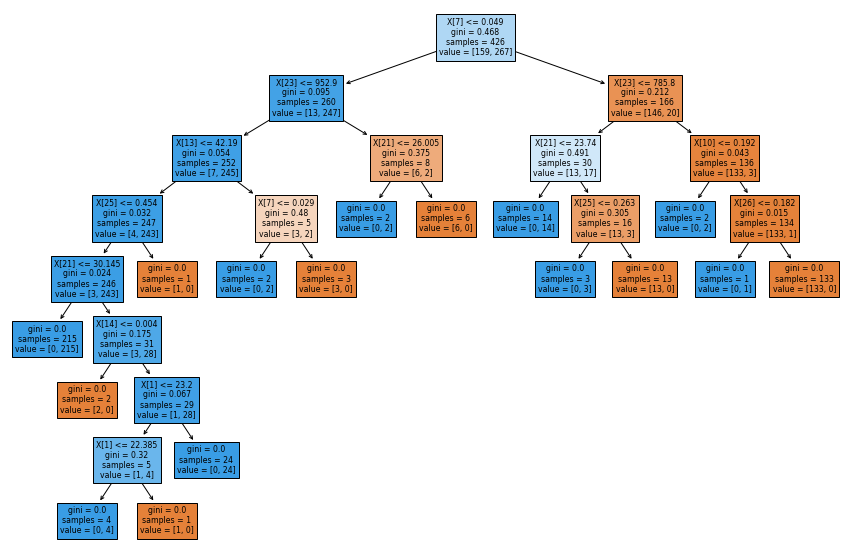

In [9]:
# lets plot tree for better understanding
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [8]:
## libraries for plotting tree
from sklearn.tree import  export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

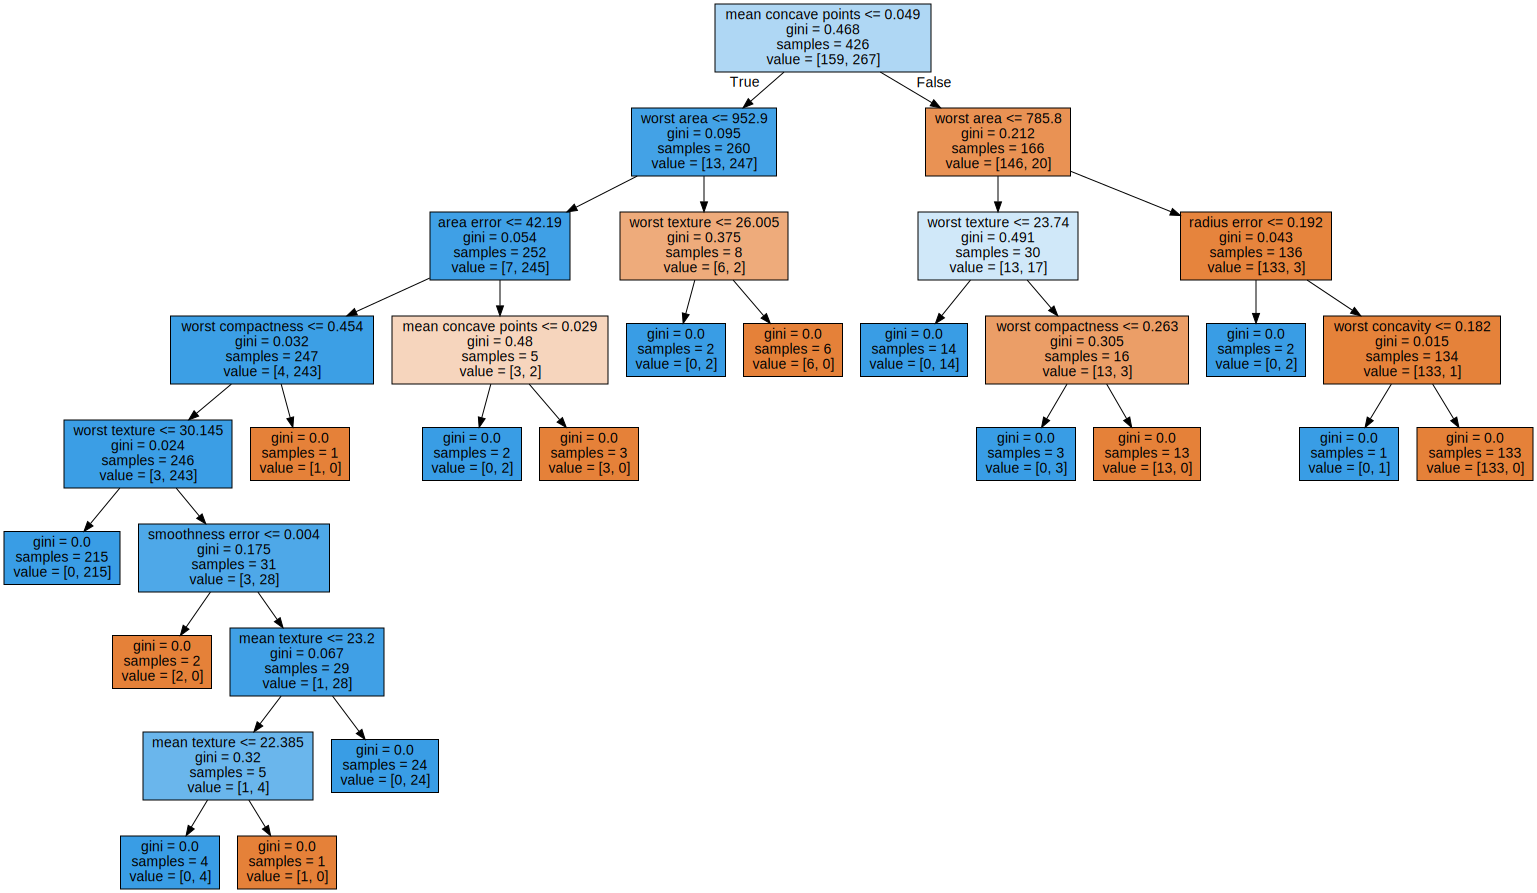

<Figure size 72x72 with 0 Axes>

In [10]:
## plotting tree using graphviz
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=xtrain.columns
   , filled = True ) )
plt.figure(figsize=(1,1))
display(SVG(graph.pipe(format='svg')))

#**The Role of Pruning in Decision Trees**
##Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a practice which involves the selective removal of certain parts of a tree(or plant), such as branches, buds, or roots, to improve the tree’s structure, and promote healthy growth. This is exactly what Pruning does to our Decision Trees as well. It makes it versatile so that it can adapt if we feed any new kind of data to it, thereby fixing the problem of overfitting.

##It reduces the size of a Decision Tree which might slightly increase your training error but drastically decrease your testing error, hence making it more adaptable.

In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

## Now lets plot Accuracy vs alpha for training and testing sets to see which alpha value is giving high test accuracy.

In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


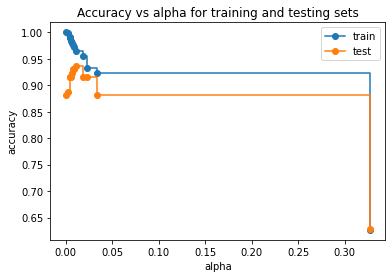

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## From the above plot, we can see that between alpha=0.01 and 0.02, we get the maximum test accuracy.

In [21]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=0)

In [15]:
## predicting on unseen data
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9370629370629371

## we can see that accuracy score has increased after pruning

In [16]:
clf.score(X_train,y_train) # accuracy of trained model

0.9647887323943662

[Text(0.5, 0.875, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.125, 0.375, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.375, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.375, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.875, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

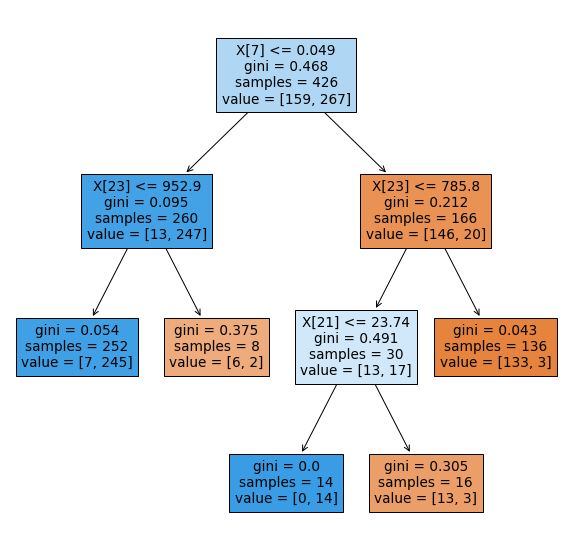

In [17]:
## plotting tree after pruning
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)

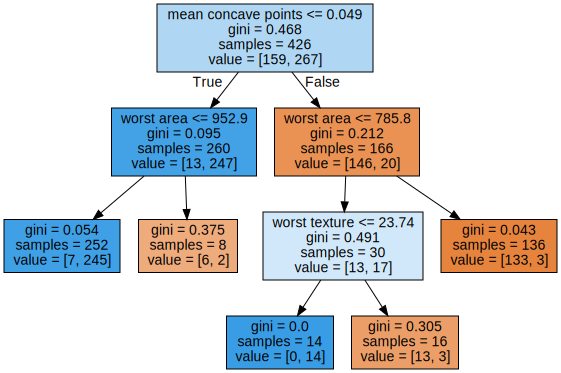

<Figure size 72x72 with 0 Axes>

In [22]:
## plotting tree using graphviz
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=xtrain.columns
   , filled = True ) )
plt.figure(figsize=(1,1))
display(SVG(graph.pipe(format='svg')))

## We can size of graph is decreased after pruning the tree